<a href="https://colab.research.google.com/github/MahithaPoduvu/Mahitha_INFO5731_-Spring2023/blob/main/INFO5731_Assignment_Four_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
#  to load data
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/AllProductReviews.csv')
# Remove punctuation
df['Reviews_processed'] = \
df['ReviewBody'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['Reviews_processed'] = \
df['ReviewBody'].map(lambda x: x.lower())
# Print out the first rows of papers
df['Reviews_processed'].head()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df['Reviews_processed']=df['ReviewBody'].apply(remove_stopwords)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence '\.'
<>:7: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-11-936948bfa762>:7: DeprecationWarning: invalid escape sequence '\.'
  df['ReviewBody'].map(lambda x: re.sub('[,\.!?]', '', x))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output
text_list=df['Reviews_processed'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This  earphones unreliable, bought 15 days meanwhile right side ear buds got cracked automatically got divided two parts, sound quality also much good ok, one thing bass good boat earphones.Guys,Also proof attached picsPlease see think buying​ unreliable product.Thanks.

['unreliable', 'day', 'right', 'side', 'ear', 'bud', 'part', 'sound', 'quality', 'good', 'ok', 'thing', 'bass', 'good', 'boat', 'guy', 'proof', 'think', 'unreliable', 'product', 'thank']


In [ ]:
#LSA implemented with TF
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...
vect_text=vect.fit_transform(df['Reviews_processed'])
print(vect_text.shape)
print(vect_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(14337, 1000)
  (0, 937)	0.15160674575263752
  (0, 471)	0.21331087511102687
  (0, 639)	0.18608992730799118
  (0, 543)	0.140830547368153
  (0, 699)	0.06831298870901673
  (0, 517)	0.14826105641721687
  (0, 626)	0.20294270787424512
  (0, 986)	0.15586554925583834
  (0, 688)	0.2056494221797231
  (0, 665)	0.18889680549599025
  (0, 371)	0.25003637871526385
  (0, 525)	0.19504046883109372
  (0, 500)	0.14884498382302652
  (0, 103)	0.15773357676412342
  (0, 968)	0.17558741698083066
  (0, 124)	0.17744037959746908
  (0, 279)	0.2004388324928685
  (0, 284)	0.12248095429427192
  (0, 620)	0.19360552776887544
  (0, 703)	0.1337088112258296
  (0, 108)	0.13251314891412708
  (0, 42)	0.23857208068813024
  (0, 507)	0.18308787344565752
  (0, 902)	0.1971588512749146
  (0, 882)	0.18014500713407106
  :	:
  (14334, 811)	1.0
  (14335, 965)	0.42196364100096095
  (14335, 489)	0.36476579749709415
  (14335, 681)	0.22202681913348815
  (14335, 392)	0.5709082602694996
  (14335, 500)	0.4332821743238647
  (14335, 90)	0.2985

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[ 0.13977712 -0.18783829 -0.08314075 ...  0.13937207  0.0816113
  -0.15425938]
 [ 0.27460387 -0.11095698 -0.00549763 ... -0.02029142  0.03961626
  -0.0769222 ]
 [ 0.28296977 -0.09249713 -0.05709184 ...  0.10714882 -0.11884324
   0.0528003 ]
 ...
 [ 0.28927856 -0.34198113 -0.32260779 ... -0.07519257 -0.00222977
  -0.00514724]
 [ 0.63655777  0.16367589  0.04623432 ...  0.32215024 -0.22158809
   0.07130717]
 [ 0.05204323 -0.08497453  0.02820248 ... -0.0272668   0.14383541
   0.20149214]]
(14337, 10)


In [ ]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  13.977711778933283
Topic  1  :  -18.78382859723754
Topic  2  :  -8.314075240378108
Topic  3  :  -4.539463043078819
Topic  4  :  -10.564674461146433
Topic  5  :  1.279148728766772
Topic  6  :  3.556931763580249
Topic  7  :  13.937207489502251
Topic  8  :  8.161130211975308
Topic  9  :  -15.425937827959165


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 8.82524963e-03  3.28404099e-03  3.32287930e-03 ...  2.02402257e-03
   9.19135891e-04  1.70530692e-03]
 [-1.39514285e-02 -4.94069175e-03 -3.37050170e-03 ... -3.73420794e-03
  -1.44863928e-03 -2.85931981e-03]
 [-1.86761735e-03 -2.12917519e-05 -6.57661580e-04 ...  4.62894816e-04
  -5.62916721e-04  1.78804635e-04]
 ...
 [ 1.23764328e-02  1.01202163e-02  3.45823440e-03 ...  1.06780289e-03
   1.10700752e-03  2.71433013e-03]
 [-8.78693210e-03 -3.32016389e-03  2.41666836e-03 ... -1.10249682e-03
   1.36662142e-03  5.07881152e-03]
 [-3.32458787e-03 -1.89420206e-03  7.33176134e-05 ... -1.36473328e-03
  -1.25594084e-03 -1.78289558e-03]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
good quality sound product bass battery nice price awesome best 

Topic 1: 
good click dual tips concern show function switched traffic stuff 

Topic 2: 
product nice working money buy worst stopped amazon one months 

Topic 3: 
nice sound quality good base material backup superb build comfortable 

Topic 4: 
product quality awesome sound excellent poor material superb super build 

Topic 5: 
awesome bass best price earphones nice good range battery go 

Topic 6: 
best price range bass great excellent product earphones value money 

Topic 7: 
battery life backup great bass money value hours poor also 

Topic 8: 
money bass value great worth noise cancellation like buy waste 

Topic 9: 
money value worth best battery life awesome quality waste working 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
from pandas.io.formats.format import DataFrameFormatter
#Importing libaries
import warnings
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
%matplotlib inline
warnings.filterwarnings('ignore')
#  to load data
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/AllProductReviews.csv')
df.head

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<bound method NDFrame.head of                                             ReviewTitle  \
0                 Honest review of an edm music lover\n   
1                 Unreliable earphones with high cost\n   
2                            Really good and durable.\n   
3                     stopped working in just 14 days\n   
4      Just Awesome Wireless Headphone under 1000...😉\n   
...                                                 ...   
14332                                            Good\n   
14333                                 Amazing Product\n   
14334                                         Not bad\n   
14335                                  a good product\n   
14336           Average headphones , n overrated name\n   

                                              ReviewBody  ReviewStar  \
0      No doubt it has a great bass and to a great ex...           3   
1      This  earphones are unreliable, i bought it be...           1   
2      i bought itfor 999,I purchased it seco

In [ ]:
# for preprocessing data
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
#Lowercase all texts
df['ReviewBody'] = df['ReviewBody'].str.lower()
# remove twitter handles (@user)
df['clean_reviews'] = np.vectorize(remove_pattern)(df['ReviewBody'], "@[\w]*")
# remove special characters, numbers and punctuations
df['clean_reviews'] = df['clean_reviews'].str.replace("[^a-zA-Z#]", " ")
# remove short words less tha 3 characters long
df['clean_reviews'] = df['clean_reviews'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head

<bound method NDFrame.head of                                             ReviewTitle  \
0                 Honest review of an edm music lover\n   
1                 Unreliable earphones with high cost\n   
2                            Really good and durable.\n   
3                     stopped working in just 14 days\n   
4      Just Awesome Wireless Headphone under 1000...😉\n   
...                                                 ...   
14332                                            Good\n   
14333                                 Amazing Product\n   
14334                                         Not bad\n   
14335                                  a good product\n   
14336           Average headphones , n overrated name\n   

                                              ReviewBody  ReviewStar  \
0      no doubt it has a great bass and to a great ex...           3   
1      this  earphones are unreliable, i bought it be...           1   
2      i bought itfor 999,i purchased it seco

In [ ]:
#sentiment lexicon
#!pip install TextBlob
from textblob import TextBlob

def getTextSubjectivity(tokenized_reviews):
  return TextBlob(tokenized_reviews).sentiment.subjectivity
#to get text polarity
def getTextPolarity(tokenized_tweet):
  return TextBlob(tokenized_reviews).sentiment.polarity

df_subjectivity = df['clean_reviews'].apply(getTextSubjectivity)
df_polarity = df['clean_reviews'].apply(getTextSubjectivity)
#print(data_subjectvity,data_polarity)

def getTextAnalysis(a):
  if a<0:
    return "Negative"
  elif a==0:
    return "Neutral"
  else:
    return "Positive"
df_score= df_polarity.apply(getTextAnalysis)

In [ ]:
# to create the data frame
frame = { 'AllProductReviews': df['ReviewBody'], 'Polarity': df_polarity, 'Score' : df_score, 'Subjectivity' : df_subjectivity }
#Creating DataFrame by passing Dictionary
df = pd.DataFrame(frame)
#print(df.head)

#to get the percentage of positive tweets
positive = df[df['Score']=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"% of positive tweets")
pos =positive.shape[0]/df.shape[0]*100

#to get the percentage of negative tweets
negative = df[df['Score']=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"% of negative tweets")
pos = negative.shape[0]/df.shape[0]*100

#to get the percentage of neutral tweets
neutral = df[df['Score']=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of neutral tweets")
pos = neutral.shape[0]/df.shape[0]*100

# plot bar graph 
labels=df.groupby('Score').count().index.values
values = df.groupby('Score').size().values
#plt.bar(labels,values)

91.14180093464462% of positive tweets
0.0% of negative tweets
8.858199065355373% of neutral tweets


In [ ]:
# models , I am using different data set here.
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
#  to load data
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/IMDB Dataset.csv')
data.head


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<bound method NDFrame.head of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [ ]:
data = data.fillna(0)

In [ ]:
data['sentiment'] = data['sentiment'].map({'negative' : 0, 'positive' : 1})
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    Message = text.lower()
    Message = re.sub('\[.*?\]', '', Message)
    Message = re.sub('https?://\S+|www\.\S+', '', Message)
    Message = re.sub('<.*?>+', '', Message)
    Message = re.sub('[%s]' % re.escape(string.punctuation), '', Message)
    Message = re.sub('\n', '', Message)
    Message = re.sub('\w*\d\w*', '', Message)
    return Message

data['cleaned_review'] = data['review'].apply(clean_text)

In [ ]:
data['review'].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
data['cleaned_review'].iloc[0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

In [ ]:
x = data["cleaned_review"]
y = data["sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
xv_train

<37500x178457 sparse matrix of type '<class 'numpy.float64'>'
	with 5068481 stored elements in Compressed Sparse Row format>

In [ ]:
data.isnull().sum()

review            0
sentiment         0
cleaned_review    0
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report # Evaluation for Model

dt_model = DecisionTreeClassifier(random_state = 123, max_depth=10, min_samples_leaf=6)
  
# Performing training
dt_model.fit(xv_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, random_state=123)

In [ ]:
# Prediction using gini
y_pred = dt_model.predict(xv_test)


cf = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(cf)
print(classification_report)

[[4202 2094]
 [1476 4728]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      6296
           1       0.69      0.76      0.73      6204

    accuracy                           0.71     12500
   macro avg       0.72      0.71      0.71     12500
weighted avg       0.72      0.71      0.71     12500



In [ ]:
from sklearn.svm import SVC  
svc_clr = SVC(kernel='linear') 
  
# fitting x samples and y classes 
svc_clr.fit(xv_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svc = svc_clr.predict(xv_test)

from sklearn.metrics import confusion_matrix, classification_report 
cf = confusion_matrix(y_test, y_pred_svc)
classification_report = classification_report(y_test, y_pred_svc)

print(cf)
print(classification_report)

[[5585  711]
 [ 605 5599]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6296
           1       0.89      0.90      0.89      6204

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [30]:
import pandas as pd
sf = pd.read_csv("/content/train.csv")
print(sf.head)
sf.info # to get the info of the data




<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [33]:
sf.drop(sf.columns[[0]], axis=1, inplace=True)
sf.info()
sf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


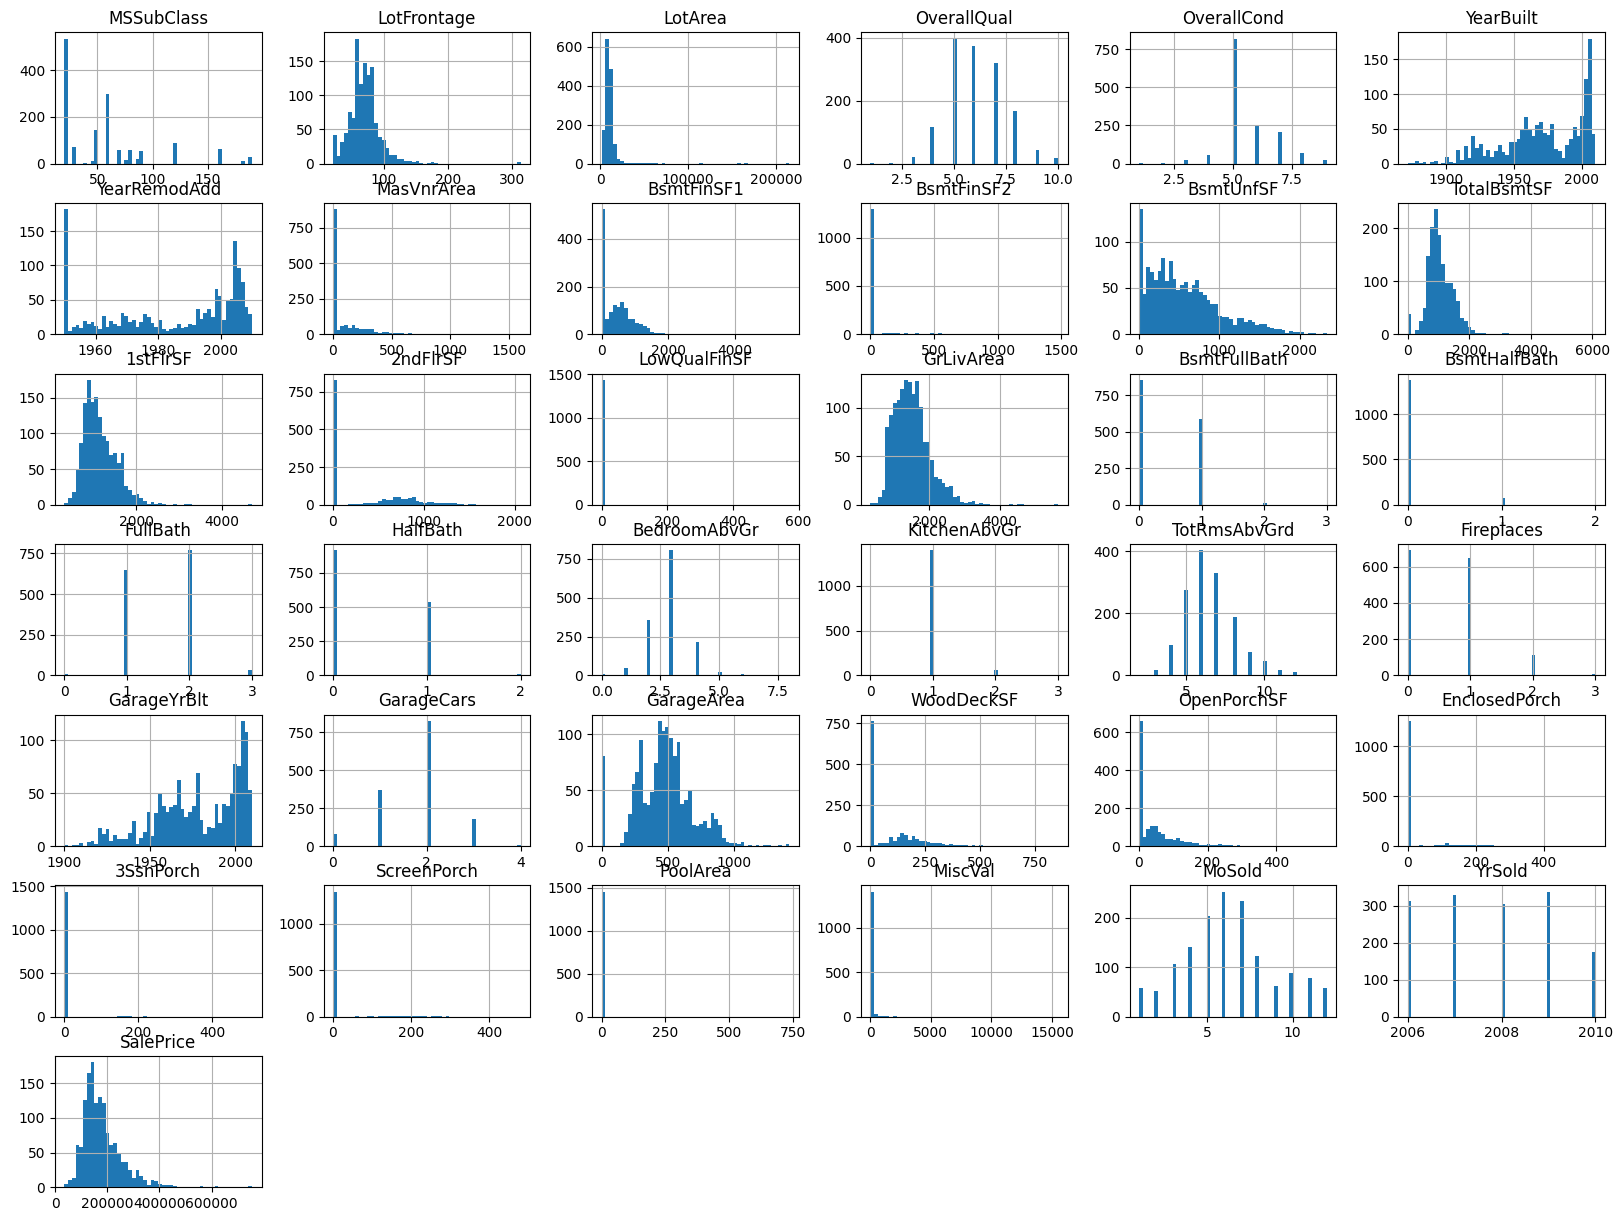

In [34]:
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [36]:
corr_matrix = sf.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

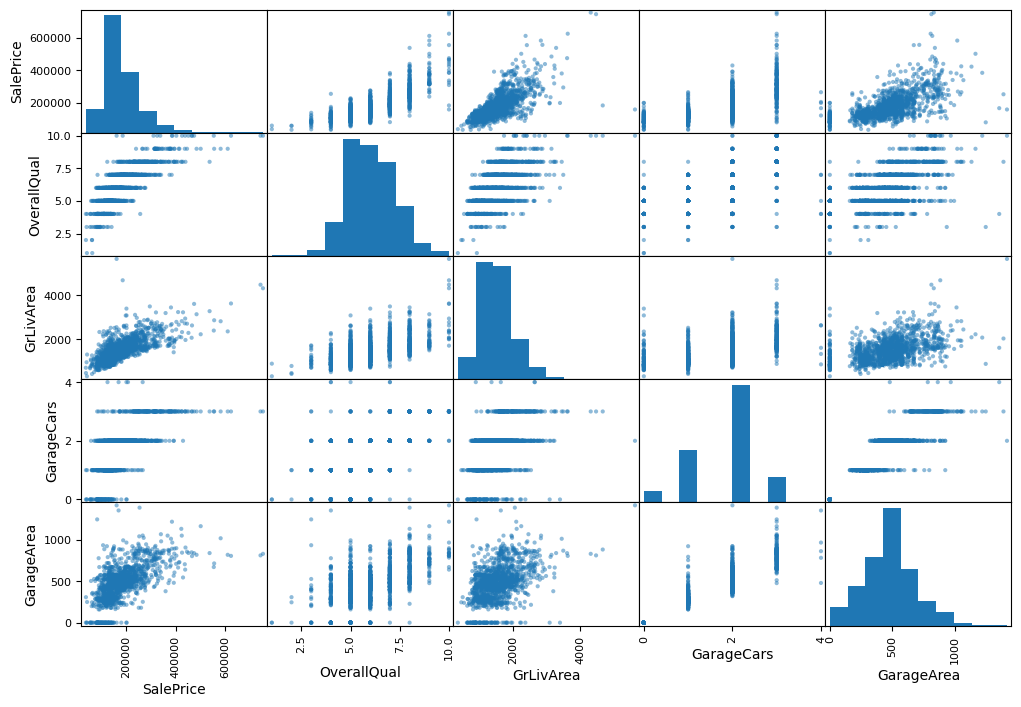

In [40]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars","GarageArea"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

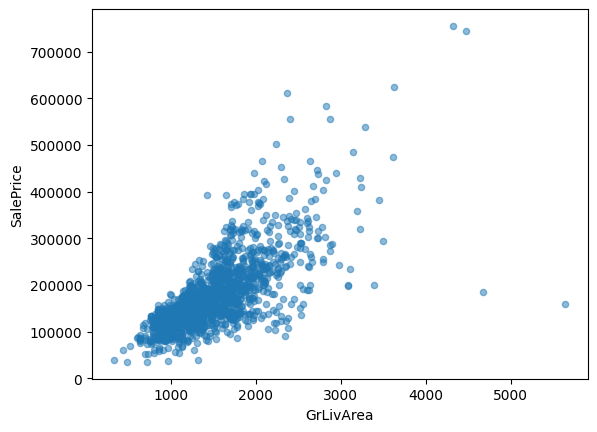

In [41]:
sf.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)
plt.savefig('scatter.png')

In [45]:
X = sf[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',"BldgType","HouseStyle"]]
Y = sf['SalePrice']

n = pd.get_dummies(sf.BldgType)
X = pd.concat([X, n], axis=1)
m = pd.get_dummies(sf.HouseStyle)
X = pd.concat([X, m], axis=1)
drops = ['BldgType', 'HouseStyle']
X.drop(drops, inplace=True, axis=1)
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,7,1710,2,548,856,856,1,0,0,0,0,0,0,0,0,0,1,0,0
1,6,1262,2,460,1262,1262,1,0,0,0,0,0,0,1,0,0,0,0,0
2,7,1786,2,608,920,920,1,0,0,0,0,0,0,0,0,0,1,0,0
3,7,1717,3,642,756,961,1,0,0,0,0,0,0,0,0,0,1,0,0
4,8,2198,3,836,1145,1145,1,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.7081


In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 44518.7145


In [50]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 25176.3912


In [52]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.8419


In [53]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 32763.1049


In [54]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.8482


In [55]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 32099.9897
